In [1]:
import pandas as pd
from scipy.spatial.distance import cosine
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
items = pd.read_excel('Customer Preference Survey.xlsx')

In [3]:
items.head()

ประทับเวลา จักรยานเสือภูเขา คอลลาเจน Brownie อวกาศ  แม่โขง  \
0 2021-03-20 11:29:58.994              NaN      NaN           NaN     NaN   
1 2021-03-20 11:33:10.114              NaN      NaN           NaN     NaN   
2 2021-03-20 11:53:44.586           ไม่เคย   ไม่เคย        ไม่เคย  ไม่เคย   
3 2021-03-20 11:54:00.984           ไม่เคย      เคย        ไม่เคย     เคย   
4 2021-03-20 11:54:05.084              เคย   ไม่เคย        ไม่เคย  ไม่เคย   

    Botox   กัญชา   กัญชง เครื่องวัดความดัน หลอดไฟเปลี่ยนสีได้  ... มะม่วงเบา  \
0     NaN     NaN     NaN               NaN                NaN  ...       NaN   
1     NaN     NaN     NaN               NaN                NaN  ...       NaN   
2  ไม่เคย  ไม่เคย  ไม่เคย            ไม่เคย             ไม่เคย  ...    ไม่เคย   
3  ไม่เคย  ไม่เคย  ไม่เคย               เคย             ไม่เคย  ...       เคย   
4  ไม่เคย  ไม่เคย  ไม่เคย               เคย                เคย  ...       เคย   

  ห้องน้ำแมวอัตโนมัติ กระเป๋า chanel ข้าวขาหมูคากิคาจักออนไลน์ ถั่งเช่า  \
0                 NaN            NaN                       NaN      NaN   
1                 NaN            NaN                       NaN      NaN   
2              ไม่เคย         ไม่เคย                    ไม่เคย   ไม่เคย   
3              ไม่เคย         ไม่เคย                    ไม่เคย      เคย   
4              ไม่เคย         ไม่เคย                    ไม่เคย   ไม่เคย   

  หมอนสุขภาพสำหรับคนนอนไม่หลับ อาหารแมวคลีนเพื่อสุขภาพลดหุ่น น้ำส้มดีโด้  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                       ไม่เคย                        ไม่เคย         เคย   
3                          เคย                        ไม่เคย         เคย   
4                          เคย                        ไม่เคย         เคย   

  Software ถูกลิขสิทธิ์ ครีมกันแดด  
0                   NaN        NaN  
1                   NaN        NaN  
2                   เคย        เคย  
3                ไม่เคย        เคย  
4                   เคย        เคย  

[5 rows x 62 columns]

In [4]:
items.drop('ประทับเวลา', axis=1, inplace=True)

In [5]:
items.dropna(thresh=30, inplace=True)

In [6]:
items.replace({'NaN': 0, 'ไม่เคย': 0, 'เคย': 1}, inplace=True)

In [7]:
items.head()

จักรยานเสือภูเขา  คอลลาเจน  Brownie อวกาศ  แม่โขง  Botox  กัญชา  กัญชง  \
2                 0         0              0       0      0      0      0   
3                 0         1              0       1      0      0      0   
4                 1         0              0       0      0      0      0   
5                 0         0              0       1      0      1      0   
6                 0         1              0       0      1      0      0   

   เครื่องวัดความดัน  หลอดไฟเปลี่ยนสีได้  คอร์ส bikini wax  ...  มะม่วงเบา  \
2                  0                   0                 0  ...          0   
3                  1                   0                 0  ...          1   
4                  1                   1                 0  ...          1   
5                  0                   0                 0  ...          0   
6                  0                   0                 0  ...          0   

   ห้องน้ำแมวอัตโนมัติ  กระเป๋า chanel  ข้าวขาหมูคากิคาจักออนไลน์  ถั่งเช่า  \
2                    0             0.0                          0       0.0   
3                    0             0.0                          0       1.0   
4                    0             0.0                          0       0.0   
5                    0             0.0                          0       0.0   
6                    0             1.0                          0       0.0   

   หมอนสุขภาพสำหรับคนนอนไม่หลับ  อาหารแมวคลีนเพื่อสุขภาพลดหุ่น  น้ำส้มดีโด้  \
2                             0                              0            1   
3                             1                              0            1   
4                             1                              0            1   
5                             0                              0            0   
6                             1                              0            1   

   Software ถูกลิขสิทธิ์  ครีมกันแดด  
2                      1           1  
3                      0           1  
4                      1           1  
5                      0           1  
6                      1           1  

[5 rows x 61 columns]

Create empty matrix with size: number of items x number of items

In [8]:
data_ibs = pd.DataFrame(index=items.columns,columns=items.columns)

In [9]:
data_ibs.head()

จักรยานเสือภูเขา คอลลาเจน Brownie อวกาศ แม่โขง Botox กัญชา  \
จักรยานเสือภูเขา              NaN      NaN           NaN    NaN   NaN   NaN   
คอลลาเจน                      NaN      NaN           NaN    NaN   NaN   NaN   
Brownie อวกาศ                 NaN      NaN           NaN    NaN   NaN   NaN   
แม่โขง                        NaN      NaN           NaN    NaN   NaN   NaN   
Botox                         NaN      NaN           NaN    NaN   NaN   NaN   

                 กัญชง เครื่องวัดความดัน หลอดไฟเปลี่ยนสีได้ คอร์ส bikini wax  \
จักรยานเสือภูเขา   NaN               NaN                NaN              NaN   
คอลลาเจน           NaN               NaN                NaN              NaN   
Brownie อวกาศ      NaN               NaN                NaN              NaN   
แม่โขง             NaN               NaN                NaN              NaN   
Botox              NaN               NaN                NaN              NaN   

                  ... มะม่วงเบา ห้องน้ำแมวอัตโนมัติ กระเป๋า chanel  \
จักรยานเสือภูเขา  ...       NaN                 NaN            NaN   
คอลลาเจน          ...       NaN                 NaN            NaN   
Brownie อวกาศ     ...       NaN                 NaN            NaN   
แม่โขง            ...       NaN                 NaN            NaN   
Botox             ...       NaN                 NaN            NaN   

                 ข้าวขาหมูคากิคาจักออนไลน์ ถั่งเช่า  \
จักรยานเสือภูเขา                       NaN      NaN   
คอลลาเจน                               NaN      NaN   
Brownie อวกาศ                          NaN      NaN   
แม่โขง                                 NaN      NaN   
Botox                                  NaN      NaN   

                 หมอนสุขภาพสำหรับคนนอนไม่หลับ อาหารแมวคลีนเพื่อสุขภาพลดหุ่น  \
จักรยานเสือภูเขา                          NaN                           NaN   
คอลลาเจน                                  NaN                           NaN   
Brownie อวกาศ                             NaN                           NaN   
แม่โขง                                    NaN                           NaN   
Botox                                     NaN                           NaN   

                 น้ำส้มดีโด้ Software ถูกลิขสิทธิ์ ครีมกันแดด  
จักรยานเสือภูเขา         NaN                   NaN        NaN  
คอลลาเจน                 NaN                   NaN        NaN  
Brownie อวกาศ            NaN                   NaN        NaN  
แม่โขง                   NaN                   NaN        NaN  
Botox                    NaN                   NaN        NaN  

[5 rows x 61 columns]

Fill the matrix with cosine similarity values

In [10]:
for i in range(0, len(data_ibs.columns)) :
    # Loop through each column
    for j in range(0, len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(items.iloc[:,i],items.iloc[:,j])
      
data_ibs

จักรยานเสือภูเขา  คอลลาเจน Brownie อวกาศ  \
จักรยานเสือภูเขา                             1      0.55       0.33541   
คอลลาเจน                                  0.55         1      0.268328   
Brownie อวกาศ                          0.33541  0.268328             1   
แม่โขง                                0.400892  0.320713      0.478091   
Botox                                 0.416667  0.533333      0.447214   
...                                        ...       ...           ...   
หมอนสุขภาพสำหรับคนนอนไม่หลับ          0.471405  0.612826      0.316228   
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น            0.375       0.4      0.447214   
น้ำส้มดีโด้                           0.456435  0.657267      0.244949   
Software ถูกลิขสิทธิ์                 0.583333       0.7      0.372678   
ครีมกันแดด                            0.589768   0.73721       0.32969   

                                 แม่โขง     Botox     กัญชา     กัญชง  \
จักรยานเสือภูเขา               0.400892  0.416667  0.265165      0.25   
คอลลาเจน                       0.320713  0.533333  0.141421       0.2   
Brownie อวกาศ                  0.478091  0.447214  0.632456   0.67082   
แม่โขง                                1  0.267261  0.566947  0.400892   
Botox                          0.267261         1  0.235702  0.333333   
...                                 ...       ...       ...       ...   
หมอนสุขภาพสำหรับคนนอนไม่หลับ   0.440959  0.392837  0.166667  0.117851   
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น  0.267261  0.166667  0.353553      0.25   
น้ำส้มดีโด้                     0.39036   0.30429  0.193649  0.182574   
Software ถูกลิขสิทธิ์          0.400892       0.5  0.353553  0.333333   
ครีมกันแดด                     0.551677  0.442326  0.417029  0.294884   

                              เครื่องวัดความดัน หลอดไฟเปลี่ยนสีได้  \
จักรยานเสือภูเขา                       0.458831           0.452267   
คอลลาเจน                               0.458831           0.361814   
Brownie อวกาศ                          0.102598            0.13484   
แม่โขง                                 0.367884           0.241747   
Botox                                  0.229416           0.301511   
...                                         ...                ...   
หมอนสุขภาพสำหรับคนนอนไม่หลับ           0.378517           0.355335   
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น          0.229416           0.301511   
น้ำส้มดีโด้                            0.460739           0.495434   
Software ถูกลิขสิทธิ์                  0.573539           0.552771   
ครีมกันแดด                             0.642685            0.48901   

                              คอร์ส bikini wax  ... มะม่วงเบา  \
จักรยานเสือภูเขา                         0.125  ...  0.471405   
คอลลาเจน                                   0.4  ...  0.565685   
Brownie อวกาศ                         0.223607  ...  0.210819   
แม่โขง                                0.133631  ...  0.377964   
Botox                                 0.166667  ...  0.235702   
...                                        ...  ...       ...   
หมอนสุขภาพสำหรับคนนอนไม่หลับ          0.471405  ...  0.444444   
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น             0.25  ...         0   
น้ำส้มดีโด้                           0.365148  ...  0.516398   
Software ถูกลิขสิทธิ์                     0.25  ...  0.510688   
ครีมกันแดด                            0.294884  ...  0.625543   

                              ห้องน้ำแมวอัตโนมัติ กระเป๋า chanel  \
จักรยานเสือภูเขา                         0.433013            NaN   
คอลลาเจน                                  0.34641            NaN   
Brownie อวกาศ                            0.516398            NaN   
แม่โขง                                    0.46291            NaN   
Botox                                     0.19245            NaN   
...                                           ...            ...   
หมอนสุขภาพสำหรับคนนอนไม่หลับ             0.272166            NaN   
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น             0.57735            NaN   
น้ำส้มดีโด้                   

Create link for every pair of items and their cosine similarity value

In [11]:
links = data_ibs.stack().reset_index()
links.columns = ['edge1', 'edge2','value']

Filter out links with similarity less than 0.5 and not the same item link to itself

In [12]:
links_filtered = links.loc[ (links['value'] > 0.5) & (links['edge1'] != links['edge2']) ]

Item-Item collaborative filtering

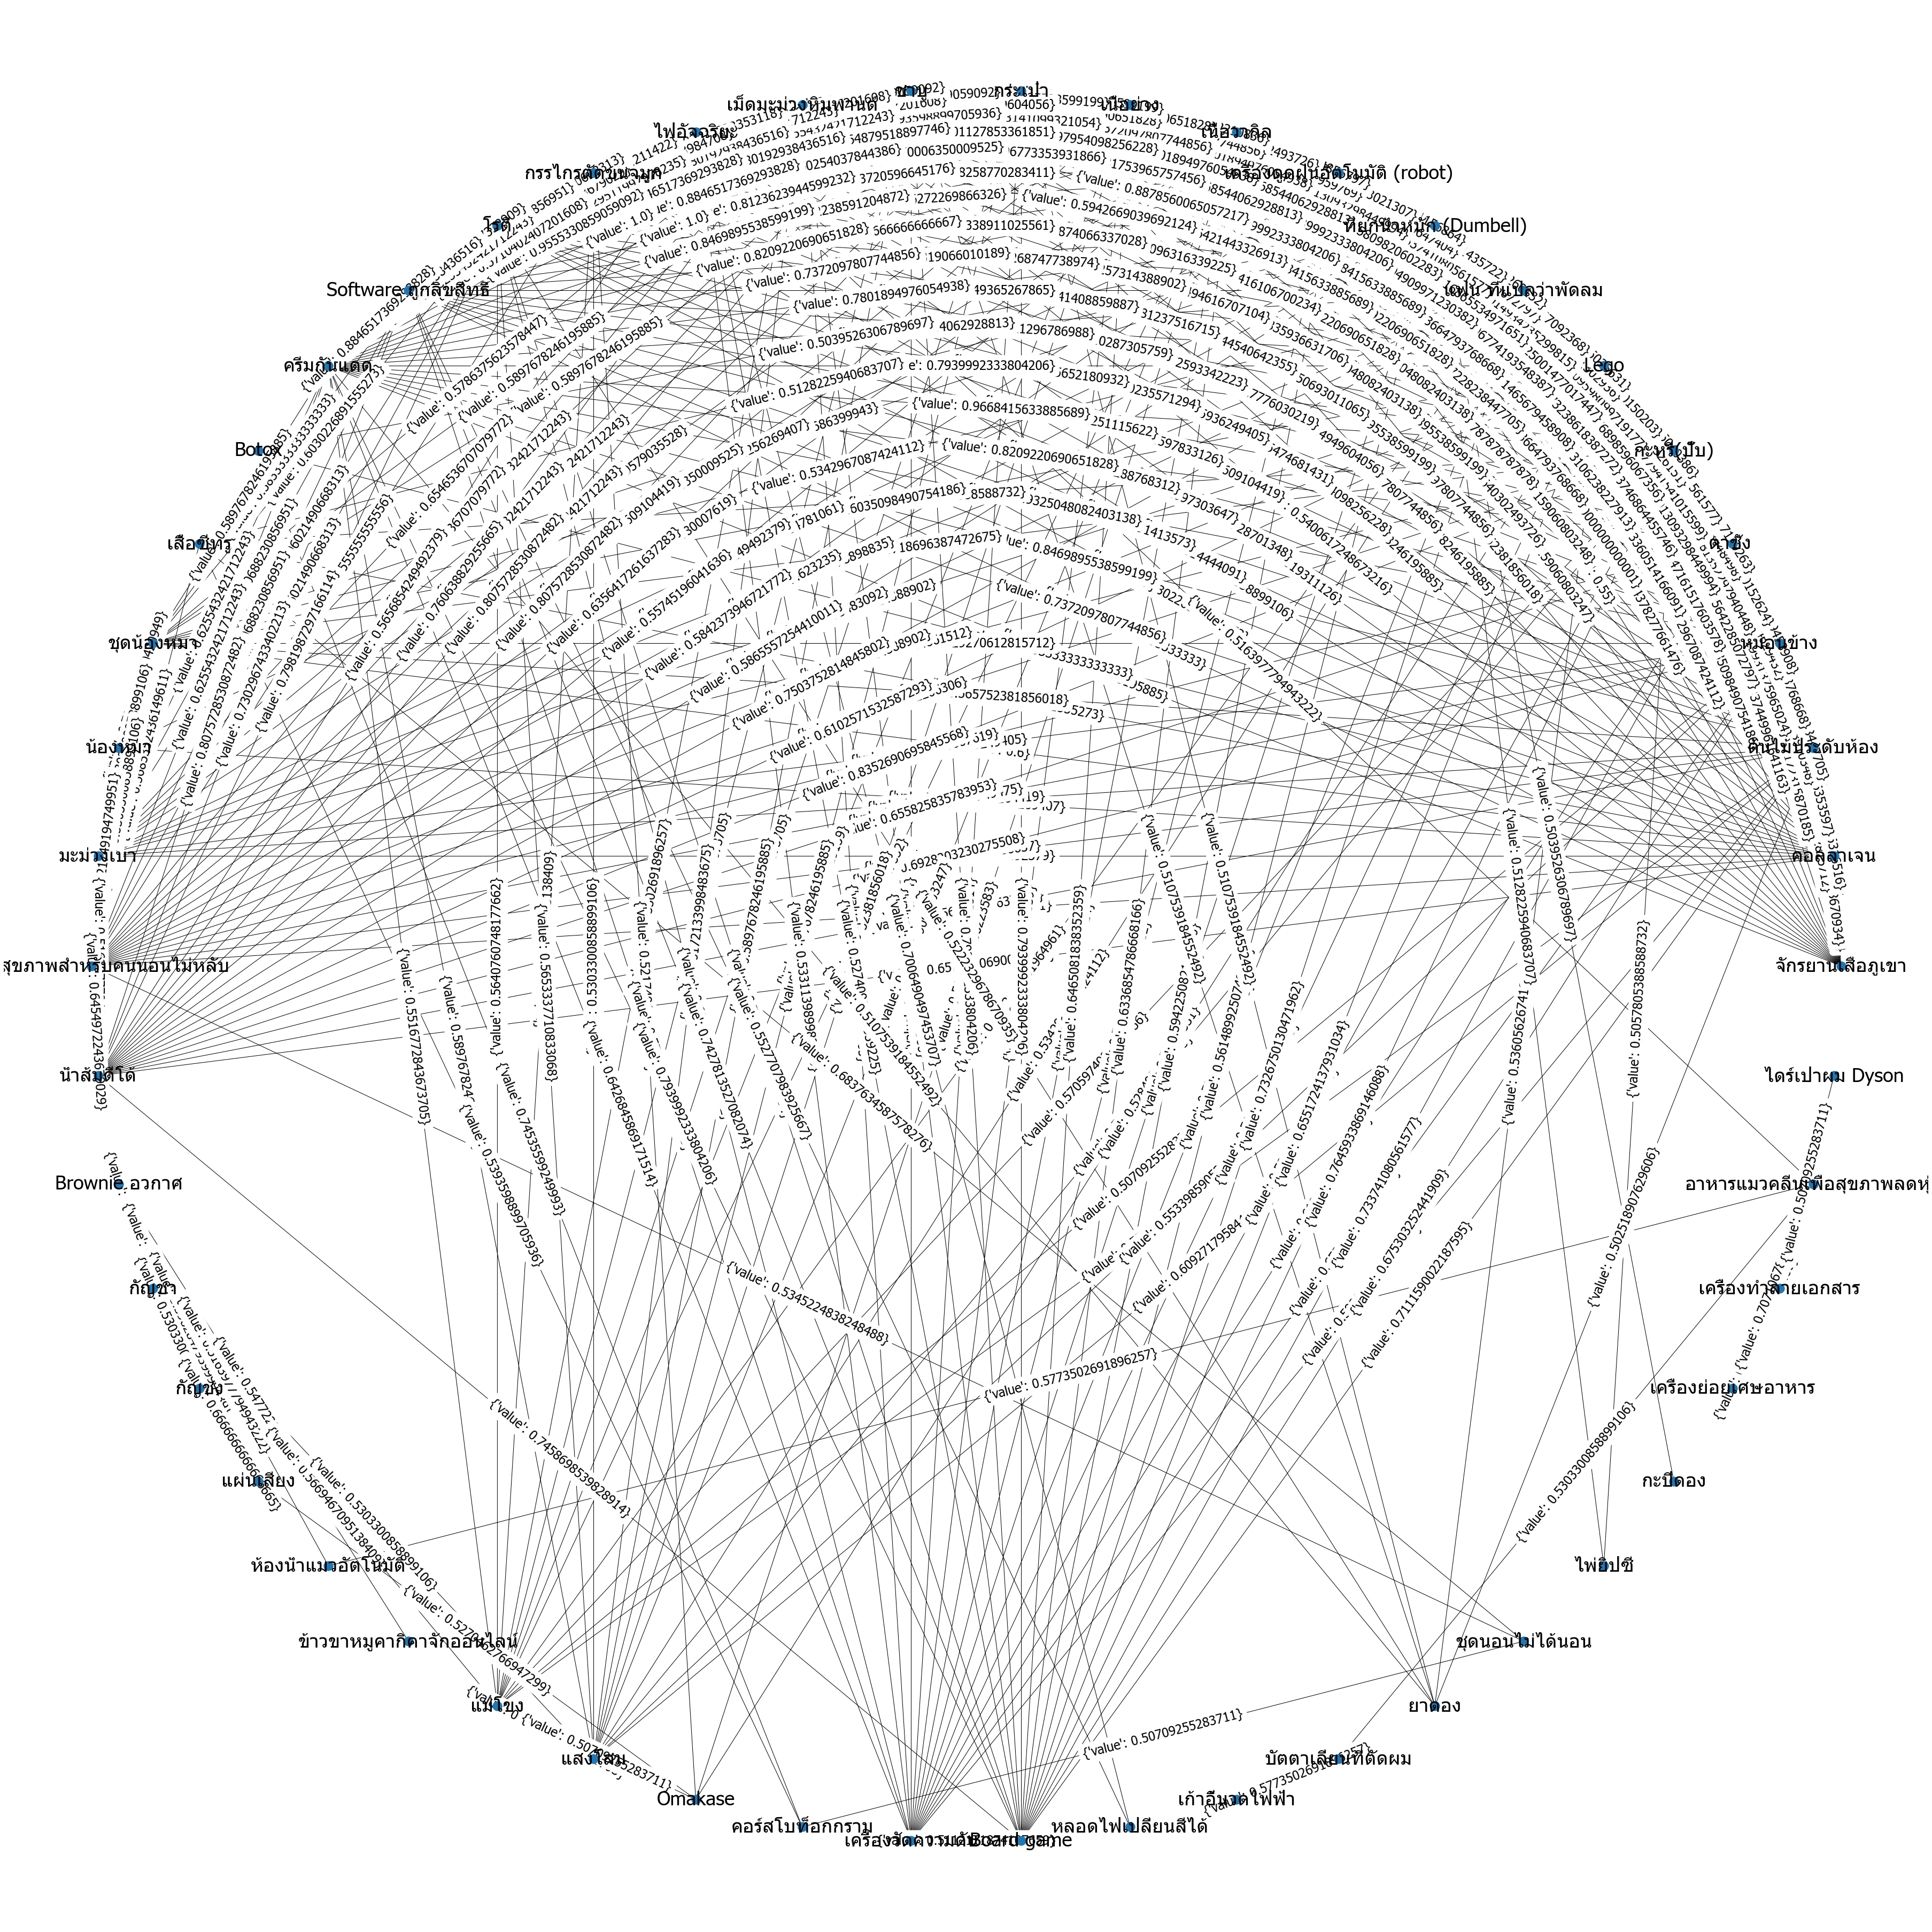

In [13]:
plt.figure(figsize=(50,50))

G = nx.from_pandas_edgelist(links_filtered, 'edge1', 'edge2', 'value')
pos = nx.circular_layout(G)
nx.draw(G, pos, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(G, pos, font_family='Tahoma', font_size=36)
edge_labels = nx.get_edge_attributes(G,'value')
nx.draw_networkx_edge_labels(G, pos, labels = edge_labels, font_family='Tahoma', font_size=24)
plt.savefig('Customer Preference Survey.png')
plt.show()